# Data Exploration 02

In [1]:
import datetime
now = datetime.datetime.now()
print(f'Version: {now.strftime("%Y-%m-%d %H:%M:%S")}')

Version: 2020-03-24 13:11:44


# Standard Dataset

In [2]:
# import
import seaborn as sns; sns.set()
import pandas as pd

csv_path = './data/dataset_standard.csv'
df = pd.read_csv(csv_path)

In [3]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Columns: 1914 entries, RID to target_Ventricles
dtypes: float64(78), int64(8), object(1828)
memory usage: 186.1+ MB


In [4]:
df

,RID,PTID,VISCODE,SITE,D1,D2,COLPROT,ORIGPROT,EXAMDATE,DX_bl,...,PTAU_UPENNBIOMK9_04_19_17,COMMENT_UPENNBIOMK9_04_19_17,update_stamp_UPENNBIOMK9_04_19_17,diagnosis,AGE_AT_EXAM,prev_diagnosis,next_diagnosis,target_diagnosis,target_ADAS13,target_Ventricles
0,2,011_S_0002,bl,11,1,1,ADNI1,ADNI1,2005-09-08,CN,...,NaN,,,CN,74.300000,NaN,CN,CN,19.67,NaN
1,2,011_S_0002,m06,11,1,1,ADNI1,ADNI1,2006-03-06,CN,...,NaN,,,CN,74.790075,CN,CN,CN,20.00,NaN
2,2,011_S_0002,m36,11,1,1,ADNI1,ADNI1,2008-08-27,CN,...,NaN,,,CN,77.267830,CN,CN,CN,23.00,NaN
3,2,011_S_0002,m60,11,1,1,ADNIGO,ADNI1,2010-09-22,CN,...,NaN,,,CN,79.337645,CN,NaN,CN,NaN,NaN
4,2,011_S_0002,m66,11,1,1,ADNIGO,ADNI1,2011-03-04,CN,...,NaN,,,CN,79.783915,CN,CN,CN,21.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12736,5295,057_S_5295,bl,57,1,1,ADNI2,ADNI2,2013-12-11,SMC,...,8.53,NaN,2017-04-20 14:39:56.0,CN,75.500000,NaN,NaN,CN,NaN,NaN
12737,5295,057_S_5295,m03,57,1,1,ADNI2,ADNI2,2014-02-14,SMC,...,NaN,,,CN,75.677960,CN,CN,CN,18.00,NaN
12738,5295,057_S_5295,m24,57,1,1,ADNI2,ADNI2,2015-12-08,SMC,...,NaN,,,CN,77.490418,NaN,NaN,NaN,NaN,NaN
12739,5296,053_S_5296,bl,53,1,1,ADNI2,ADNI2,2013-12-18,SMC,...,20.90,NaN,2017-04-20 14:39:56.0,CN,69.300000,NaN,CN,CN,15.00,NaN


In [193]:
# sort
ages = df[['RID', 'AGE_AT_EXAM', 'EXAMDATE', 'diagnosis', 'target_diagnosis']]
# ages = ages[ages['diagnosis'] != ages['target_diagnosis']].dropna()
ages

,RID,AGE_AT_EXAM,EXAMDATE,diagnosis,target_diagnosis
0,2,74.300000,2005-09-08,CN,CN
1,2,74.790075,2006-03-06,CN,CN
2,2,77.267830,2008-08-27,CN,CN
3,2,79.337645,2010-09-22,CN,CN
4,2,79.783915,2011-03-04,CN,CN
...,...,...,...,...,...
12736,5295,75.500000,2013-12-11,CN,CN
12737,5295,75.677960,2014-02-14,CN,CN
12738,5295,77.490418,2015-12-08,CN,NaN
12739,5296,69.300000,2013-12-18,CN,CN


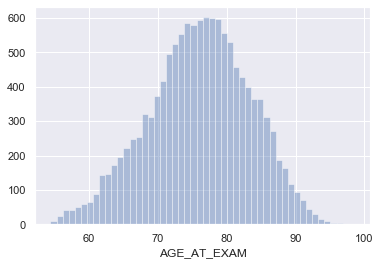

In [194]:
# age at exam
sns.distplot(ages['AGE_AT_EXAM'], kde=False)

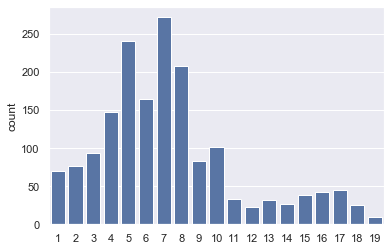

In [212]:
# no. visits per patient
sns.countplot(ages.groupby('RID').size(), color='b')

/Users/max/anaconda3/envs/babylon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


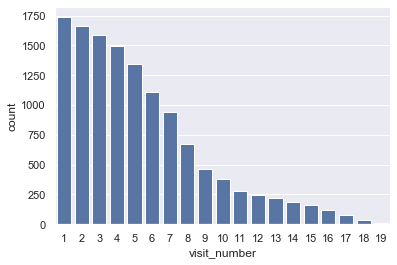

In [196]:
# visit count
ages['visit_count'] = ages.groupby('RID').apply(lambda x: x['RID'].notna()).groupby('RID').cumsum().astype('int').values
sns.countplot(ages['visit_count'], color='b') # essentially cumulative

/Users/max/anaconda3/envs/babylon/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/max/anaconda3/envs/babylon/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


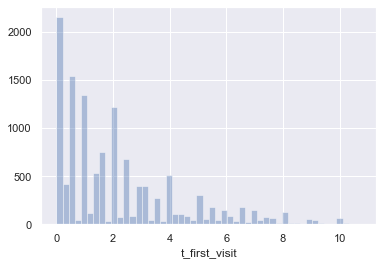

In [199]:
# time since first visit per patient
ages.EXAMDATE = pd.to_datetime(ages.EXAMDATE)
ages['t_first_visit'] = ages.groupby('RID').apply(lambda x: (x['EXAMDATE'] - x['EXAMDATE'].min()).dt.days / 365.25).values
sns.distplot(ages['t_first_visit'], kde=False)

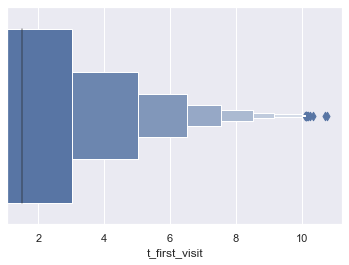

In [200]:
sns.boxenplot(ages['t_first_visit'])
# maybe biased by the number of visits - most will only do 1

In [208]:
# time since previous visit
ages['t_last_visit'] = ages['t_first_visit'] - ages.groupby('RID')['t_first_visit'].shift(periods=1)

/Users/max/anaconda3/envs/babylon/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


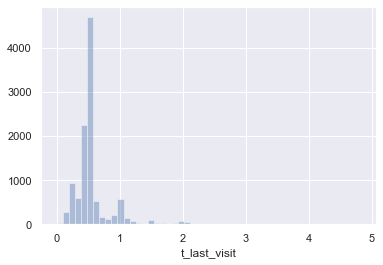

In [205]:
sns.distplot(ages['t_last_visit'], kde=False)

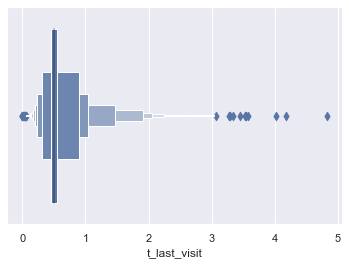

In [209]:
sns.boxenplot(ages['t_last_visit'])

In [197]:
# age at exam against visit number
# sns.relplot('AGE_AT_EXAM', 'visit_number', 'target_diagnosis', data=ages, col='diagnosis')

In [198]:
# sns.jointplot('AGE_AT_EXAM', 'visit_number', kind='kde', data=ages)

In [201]:
# sns.jointplot('t_from_first_exam', 'visit_number', data=ages)

In [202]:
# sns.relplot('t_from_first_exam', 'visit_number', 'state_change', col='target_diagnosis', data=ages)

In [237]:
# select diagnoses
diagnoses = df[['RID', 'diagnosis', 'target_diagnosis']]
diagnoses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12741 entries, 0 to 12740
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   RID               12741 non-null  int64 
 1   diagnosis         11744 non-null  object
 2   target_diagnosis  10014 non-null  object
dtypes: int64(1), object(2)
memory usage: 298.7+ KB


In [238]:
# fraction of diagnoses is NaN
diagnoses.isna().sum() / len(diagnoses)

RID                 0.000000
diagnosis           0.078251
target_diagnosis    0.214033
dtype: float64

In [239]:
# add the prev and next diagnoses
diagnoses['prev_diagnosis'] = diagnoses.groupby('RID')['diagnosis'].shift(periods=1)
diagnoses['next_diagnosis'] = diagnoses.groupby('RID')['diagnosis'].shift(periods=-1)

cond1 = diagnoses['prev_diagnosis'] == diagnoses['next_diagnosis']
cond2 = diagnoses['next_diagnosis'] != diagnoses['target_diagnosis']

print(f'n previous equals next: {cond1.sum()}')
print(f'n next not equals target: {cond2.sum()}')

n previous equals next: 7464
n next not equals target: 2727


/Users/max/anaconda3/envs/babylon/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/max/anaconda3/envs/babylon/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [240]:
# this dataset has imputation of diagnosis as standard - can we impute more? - nope, no NaNs in diagnosis
diagnoses[cond1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7464 entries, 1 to 12737
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   RID               7464 non-null   int64 
 1   diagnosis         7464 non-null   object
 2   target_diagnosis  7464 non-null   object
 3   prev_diagnosis    7464 non-null   object
 4   next_diagnosis    7464 non-null   object
dtypes: int64(1), object(4)
memory usage: 349.9+ KB


In [241]:
# lets have a look at where the next != target - look the same
diagnoses[cond2]

,RID,diagnosis,target_diagnosis,prev_diagnosis,next_diagnosis
5,2,CN,NaN,CN,NaN
7,2,MCI,NaN,NaN,NaN
9,2,CN,NaN,NaN,NaN
10,2,NaN,NaN,CN,NaN
12,2,CN,NaN,NaN,NaN
...,...,...,...,...,...
12730,5290,CN,NaN,CN,NaN
12733,5292,CN,NaN,CN,NaN
12735,5294,CN,NaN,CN,NaN
12738,5295,CN,NaN,CN,NaN


In [242]:
# are they just both null? - ok, they're all null; can any more be imputed?
temp = diagnoses[cond2]
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2727 entries, 5 to 12740
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   RID               2727 non-null   int64 
 1   diagnosis         2011 non-null   object
 2   target_diagnosis  0 non-null      object
 3   prev_diagnosis    2285 non-null   object
 4   next_diagnosis    0 non-null      object
dtypes: int64(1), object(4)
memory usage: 127.8+ KB


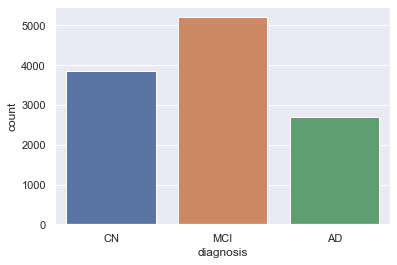

In [248]:
# diagnosis
sns.countplot(diagnoses['diagnosis'])

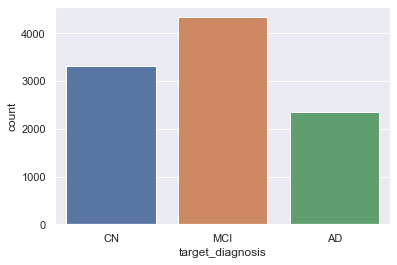

In [249]:
# target diagnosis
sns.countplot(diagnoses['target_diagnosis'])

In [265]:
# query to select only non NaN state changes
query = 'diagnosis != target_diagnosis & diagnosis == diagnosis & target_diagnosis == target_diagnosis'

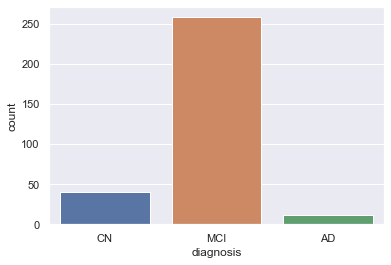

In [266]:
sns.countplot(diagnoses.query(query)['diagnosis'])

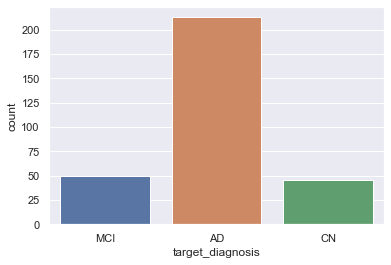

In [267]:
sns.countplot(diagnoses.query(query)['target_diagnosis'])

In [305]:
# 
import numpy as np
cond = diagnoses['diagnosis'] != diagnoses['target_diagnosis']
diagnoses['change'] = (diagnoses['diagnosis'] + ' -> ' + diagnoses['target_diagnosis']).where(cond, np.nan)

/Users/max/anaconda3/envs/babylon/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


MCI -> AD    212
MCI -> CN     46
CN -> MCI     39
AD -> MCI     11
CN -> AD       1
Name: change, dtype: int64


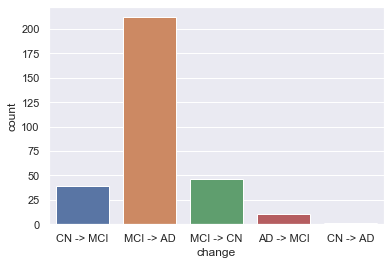

In [304]:
# 
print(diagnoses['change'].value_counts())
sns.countplot(diagnoses['change'])

In [221]:
# drop NaN to evaluate state changes
diagnoses = diagnoses.dropna(subset=['diagnosis', 'target_diagnosis'])

In [307]:
# n state changes
n_state_changes = (diagnoses.query(query)['diagnosis'] != diagnoses.query(query)['target_diagnosis']).sum()

print(f'state changes: {n_state_changes}')
print(f'state changes as frac of dataset: {n_state_changes / len(diagnoses)}')

state changes: 309
state changes as frac of dataset: 0.024252413468330587


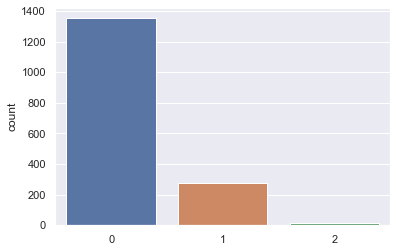

In [313]:
# no. state changes per patient
n_state_changes_per_patient = diagnoses.query('diagnosis == diagnosis & target_diagnosis == target_diagnosis').groupby('RID').apply(lambda x: x['diagnosis'] != x['target_diagnosis']).astype('int').groupby('RID').sum()
sns.countplot(n_state_changes_per_patient)

0    8553
1    1157
2      23
Name: state_change_count, dtype: int64


/Users/max/anaconda3/envs/babylon/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


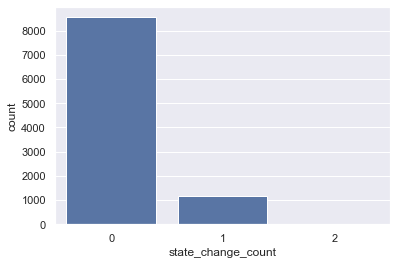

In [317]:
# state change count
with_state_changes = diagnoses.query('diagnosis == diagnosis & target_diagnosis == target_diagnosis')
with_state_changes['state_change_count'] = with_state_changes.groupby('RID').apply(lambda x: x['diagnosis'] != x['target_diagnosis']).groupby('RID').cumsum().astype('int').values
print(with_state_changes['state_change_count'].value_counts())
sns.countplot(with_state_changes['state_change_count'], color='b') # essentially cumulative


In [ ]:
# look at distribution of state changes wrt other features)


In [ ]:
# PET / CSF indicator features

In [353]:
# pet: [FDG, AV45]
pet_features = ['FDG', 'AV45']
indicators = []
for feature in pet_features:
    indicators.append(f'indicator_{feature}')
    df[f'indicator_{feature}'] = df[feature].notna().astype(int)

In [354]:
# csf: [ABETA_UPENNBIOMK9_04_19_17, TAU_UPENNBIOMK9_04_19_17, PTAU_UPENNBIOMK9_04_19_17]
csf_features = ['ABETA_UPENNBIOMK9_04_19_17', 'TAU_UPENNBIOMK9_04_19_17', 'PTAU_UPENNBIOMK9_04_19_17']
for feature in csf_features:
    indicators.append(f'indicator_{feature}')
    df[f'indicator_{feature}'] = df[feature].notna().astype(int)

In [355]:
test_df = df[['RID', 'diagnosis', 'target_diagnosis'] + indicators]
test_df = test_df.dropna()
test_df

,RID,diagnosis,target_diagnosis,indicator_FDG,indicator_AV45,indicator_ABETA_UPENNBIOMK9_04_19_17,indicator_TAU_UPENNBIOMK9_04_19_17,indicator_PTAU_UPENNBIOMK9_04_19_17
0,2,CN,CN,1,0,0,0,0
1,2,CN,CN,1,0,0,0,0
2,2,CN,CN,0,0,0,0,0
3,2,CN,CN,0,0,0,0,0
4,2,CN,CN,0,0,0,0,0
...,...,...,...,...,...,...,...,...
12732,5292,CN,CN,0,0,0,0,0
12734,5294,CN,CN,1,0,0,0,0
12736,5295,CN,CN,1,1,1,1,1
12737,5295,CN,CN,0,0,0,0,0


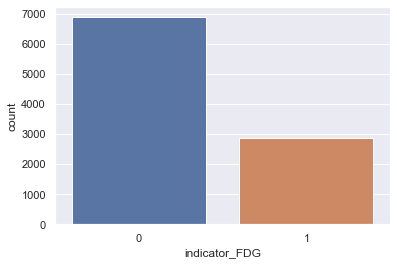

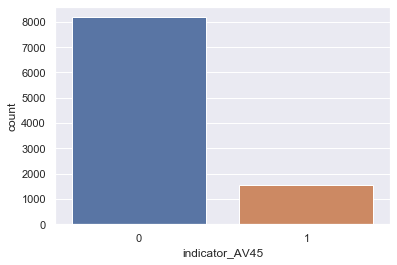

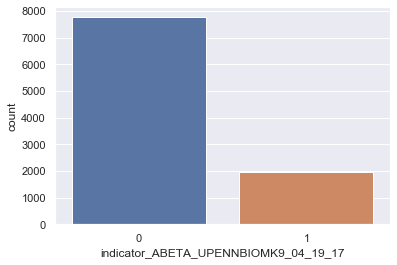

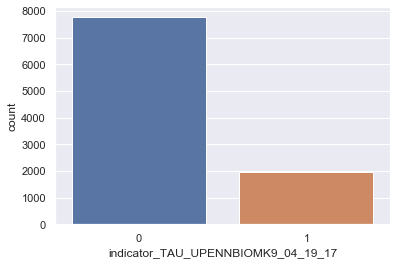

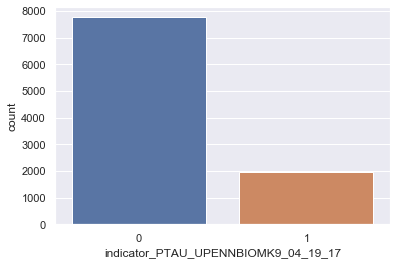

In [356]:
import matplotlib.pyplot as plt

for feature in indicators:
    sns.countplot(test_df[feature])
    plt.show()

In [357]:
test_df[indicators]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9733 entries, 0 to 12739
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   indicator_FDG                         9733 non-null   int64
 1   indicator_AV45                        9733 non-null   int64
 2   indicator_ABETA_UPENNBIOMK9_04_19_17  9733 non-null   int64
 3   indicator_TAU_UPENNBIOMK9_04_19_17    9733 non-null   int64
 4   indicator_PTAU_UPENNBIOMK9_04_19_17   9733 non-null   int64
dtypes: int64(5)
memory usage: 776.2 KB


In [ ]:
# distribution of PET indicator features

In [ ]:
# distribution of CSF indicator features

In [ ]:
# make a temporary dataset

